In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# import 
from sklearn.linear_model import LinearRegression


# object
model = LinearRegression()

In [3]:
X_train=pd.read_csv("Train.csv")
X=X_train.iloc[:,:5].values
y=X_train["target"].values


In [4]:
X_tst=pd.read_csv("Test.csv").values
X_tst = np.hstack( (np.ones((X_tst.shape[0],1)) , X_tst)  )
X_tst.shape

(400, 6)

In [5]:
X = np.hstack( (np.ones((X.shape[0],1)) , X)  )

X.shape

(1600, 6)

In [6]:
y=X_train["target"].values
y=y.reshape(y.shape[0],1)
y.shape

(1600, 1)

In [7]:
X[0]

array([ 1.        ,  0.29341624, -0.94559871, -0.42110515,  0.40681602,
        0.52566183])

In [ ]:
mu = X.mean(axis=0)
sig = X.std(axis=0)

In [ ]:
X = (X - mu)/sig


In [ ]:
X.mean()

In [8]:
# training - > fit

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
model.score(X,y)

0.9660939669975616

In [10]:
def hypothesis(X, theta):
    """
    X - np array (m,n+1)
    theta - np arrary (n+1, 1)
    """
    return np.dot(X,theta)

def error(X, y, theta):
    """
    params:
        X - np array (m,n+1)
        y - np array (m, 1)
        theta - np arrary (n+1, 1)
    
    return :
        scalar value = loss value
    """

    
    y_hat = hypothesis(X, theta) # (m,1)
    err = np.mean( (y_hat - y )**2 )
    
    return err

def gradient(X, y, theta):
    """
    X - np array (m,n+1)
    y - np array (m, 1)
    theta - np arrary (n+1, 1)
    """
    

    
    y_hat = hypothesis(X, theta)
    grad = np.dot( X.T , (y_hat - y) )
   
    return grad/X.shape[0]

def gradient_descent(X, y, lr =0.1, max_itr = 100):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(max_itr):
        
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
        
        # Updation Rule
        theta = theta - lr*grad
        
    return (theta, error_list)

In [11]:
opt_theta, error_list = gradient_descent(X, y)
opt_theta

array([[ 4.98910333],
       [29.68057644],
       [92.66035605],
       [ 8.27852441],
       [44.76602741],
       [ 2.51810348]])

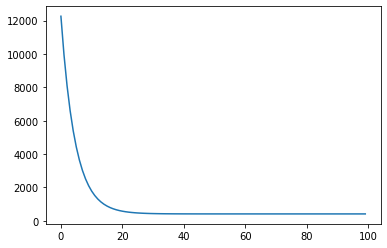

In [12]:
plt.plot(error_list)


In [14]:
y_pred = hypothesis(X_tst, opt_theta)
opt_theta

array([[ 4.98910333],
       [29.68057644],
       [92.66035605],
       [ 8.27852441],
       [44.76602741],
       [ 2.51810348]])

In [15]:
X.shape

(1600, 6)

In [16]:
y_pred.shape

(400, 1)

In [19]:
df = pd.DataFrame(data=y_pred,columns=["target"])

In [20]:
df

,target
0,114.581832
1,118.007274
2,-21.738880
3,-43.935528
4,-95.916843
...,...
395,-81.986447
396,-186.032185
397,125.289563
398,65.366714


In [23]:
df.to_csv("Air_Pollution_Pred.csv",index= True)

In [24]:
model.score(X_tst,y_pred)

0.9999999984956242